In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks/')
!pwd

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [ ]:
with open("CTRL0.txt") as f:
    ctrl0 = [line.strip() for line in f]

with open("CTRLGold.txt") as f:
    ctrl_gold = [line.strip() for line in f]

with open("CTRLPred.txt") as f:
    ctrl_pred = [line.strip() for line in f]

In [ ]:
with open("G4_b0.txt") as f:
    g0 = [line.strip() for line in f]

with open("G4_Pred_b.txt") as f:
    gp = [line.strip() for line in f]

with open("G4_Gold_b.txt") as f:
    gg = [line.strip() for line in f]

In [ ]:
with open("GUM9_brio_summaries.txt") as f:
    brio = [line.strip() for line in f]

### Extract only the test set

In [ ]:
test_indices = (2,4,21,32,46,47, 55, 67, 80,81, 105, 106, 117, 121, 132, 140, 149, 160, 169, 174, 186, 192, 197, 205)
print(len(test_indices))

24


In [ ]:
# CTRL test

c0_test = [ctrl0[i] for i in test_indices]
cg_test = [ctrl_gold[i] for i in test_indices]
cp_test = [ctrl_pred[i] for i in test_indices]

print(c0_test)

['The prevalence of discrimination across racial groups in contemporary America.', 'Eegimaa is a Jóola language spoken in the Basse Casamance area of Southern Senegal.', 'Antonín Dvořák (8 September 1841 – 1 May 1904) was a Czech composer.', 'Otto Jespersen was a Danish linguist.', 'Are you — do they still teach at Bahia on Sunday? Night? Oh yeah.', 'Sam has been, has taken such an interest in this retirement bit that it really surprises me.', '"Falling" is a novel about a woman who falls from a skyscraper.', "Steven wanted to be a dentist when he was growing up. He had a collection of dental instruments which he kept in a glass cabinet. 'Perfect Teeth' is published by Simon & Schuster at £16.99.", 'Wikinews interviews Christopher Hill, U.S. Republican Party presidential candidate.', "Robert Sarvis is the Libertarian Party's nominee for Governor of Virginia.", 'NASA celebrates 30th anniversary of first shuttle launch.', 'Sensitive Canadian document found on rainy streets.', 'The most d

In [ ]:
#GPT-4 test

g0_test = [g0[i] for i in test_indices]
gp_test = [gp[i] for i in test_indices]
gg_test = [gg[i] for i in test_indices]

print(g0_test)

['A study examining the prevalence of discrimination in the United States found that a third of people say they have faced some form of bias, with discrimination being attributed to factors including race, gender, age, religion, physical disability and sexual orientation.', 'The Gújjolaay Eegimaa language, spoken by between 7,000 and 11,200 people in the Basse Casamance area of Southern Senegal, is endangered and its transmission to younger generations has significantly declined, though understanding its contacts with other regions and languages is vital due to the tradition of Eegimaa people being given names from other communities.', 'Antonín Dvořák was a Czech Romantic-era composer, notable for incorporating rhythms of Czech folk music into his work, whose pieces achieved international recognition following their performance in Prague and endorsement by Johannes Brahms; Dvořák later became a professor at the Prague Conservatory and the director of the National Conservatory of Music 

In [ ]:
# BRIO test

brio_test = [brio[i] for i in test_indices]

print(brio_test)

['This study by Kessler and colleagues estimates the prevalence of discrimination across racial groups in the United States.', 'In the second part of our series on the languages of Senegal, we look at the different varieties of the Jola language.', "Antonn Dvok was one of the Czech Republic's leadingRomantic composers, and his symphonies and other works were performed in the UK and the United States.", 'Otto Jespersen was a Danish linguist who specialized in the grammar of the English language.', 'In our series of letters from African journalists, novelist and writer Adaobi Tricia Nwaubani tells the story of a woman who chased a man out of a dance class in Lagos.', "Here's the full transcript of the conversation between the BBC's political editor, John Humphrys, and the BBC's former chief of staff, Reg Barr, after Humphrys' resignation from the BBC's board of directors.", 'This is the story of a young woman, Derya, who works in the tower blocks of Frankfurt.', 'In our series of letters

In [ ]:
with open("c0_test.txt", "w") as outfile:
    outfile.write("\n".join(c0_test))

with open("cg_test.txt", "w") as outfile:
    outfile.write("\n".join(cg_test))

with open("cp_test.txt", "w") as outfile:
    outfile.write("\n".join(cp_test))

In [ ]:
with open("./GUM9_test/g0_test.txt", "w") as outfile:
    outfile.write("\n".join(g0_test))

with open("./GUM9_test/gg_test.txt", "w") as outfile:
    outfile.write("\n".join(gg_test))

with open("./GUM9_test/gp_test.txt", "w") as outfile:
    outfile.write("\n".join(gp_test))

In [ ]:
with open("./GUM9_test/brio_test.txt", "w") as outfile:
    outfile.write("\n".join(brio_test))


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data extracted from the LaTeX table
categories = ['ac', 'bi', 'cn', 'fc', 'it', 'nw', 'rd', 'sp', 'tx', 'vl', 'vy', 'wh']
ctrl_gold_f1 = [0.615, 0.788, 0.485, 0.538, 0.625, 0.558, 0.563, 0.299, 0.686, 0.696, 0.508, 0.643]
ctrl_pred_f1 = [0.558, 0.434, 0.413, 0.533, 0.564, 0.452, 0.500, 0.299, 0.283, 0.377, 0.360, 0.229]
ctrl_0_f1 = [0.600, 0.273, 0.333, 0.261, 0.519, 0.529, 0.316, 0.353, 0.182, 0.250, 0.158, 0.108]
brio_f1 = [0.421, 0.522, 0.284, 0.160, 0.550, 0.400, 0.417, 0.410, 0.166, 0.379, 0.099, 0.233]
gpt_gold_f1 = [0.514, 0.684, 0.595, 0.765, 0.737, 0.537, 0.765, 0.531, 0.649, 0.391, 0.413, 0.552]
gpt_pred_f1 = [0.485, 0.439, 0.513, 0.486, 0.462, 0.480, 0.667, 0.255, 0.478, 0.478, 0.508, 0.625]
gpt_0_f1 = [0.389, 0.513, 0.378, 0.500, 0.455, 0.510, 0.710, 0.500, 0.524, 0.356, 0.542, 0.633]

df = pd.DataFrame(ctrl_gold_f1, ctrl_pred_f1, ctrl_0_f1, brio_f1, gpt_gold_f1, gpt_pred_f1, gpt_0_f1)
print(df)
# Plotting
# x = range(len(categories))
# bar_width = 0.1

# fig, ax = plt.subplots(figsize=(12, 6))

# for i, category in enumerate(categories):
#     ctrl_gold_bar = ax.bar(x[i] - 3 * bar_width, ctrl_gold_f1[i], width=bar_width, label='CTRLGold', color='blue')
#     ctrl_pred_bar = ax.bar(x[i] - 2 * bar_width, ctrl_pred_f1[i], width=bar_width, label='CTRLPred', color='orange')
#     ctrl_0_bar = ax.bar(x[i] - bar_width, ctrl_0_f1[i], width=bar_width, label='CTRL0', color='green')
#     brio_bar = ax.bar(x[i], brio_f1[i], width=bar_width, label='BRIO', color='grey')
#     gpt_gold_bar = ax.bar(x[i] + bar_width, gpt_gold_f1[i], width=bar_width, label='GPTGold', color='red')
#     gpt_pred_bar = ax.bar(x[i] + 2 * bar_width, gpt_pred_f1[i], width=bar_width, label='GPTPred', color='purple')
#     gpt_0_bar = ax.bar(x[i] + 3 * bar_width, gpt_0_f1[i], width=bar_width, label='GPT0', color='pink')


# ax.set_xticks(x)
# ax.set_xticklabels(categories)
# ax.set_xlabel('Genres')
# ax.set_ylabel('F1 Score')
# ax.set_title('F1 Score per genre and model')
# ax.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
# plt.subplots_adjust(top=0.9)

# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()



TypeError: DataFrame.__init__() takes from 1 to 6 positional arguments but 8 were given

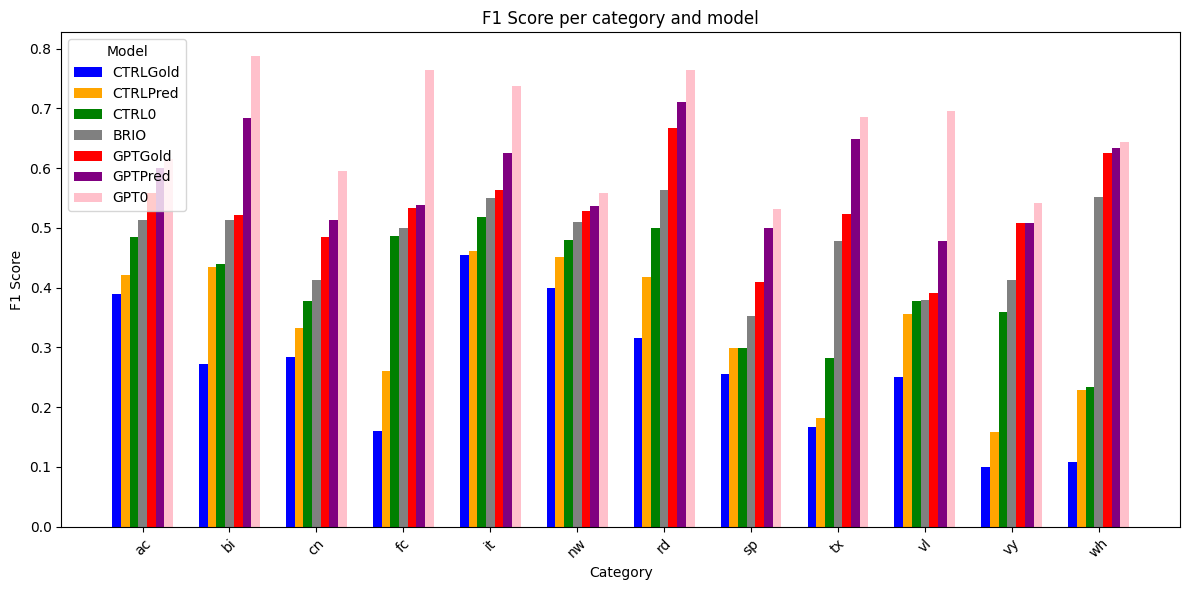

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data provided
categories = ['ac', 'bi', 'cn', 'fc', 'it', 'nw', 'rd', 'sp', 'tx', 'vl', 'vy', 'wh']
ctrl_gold_f1 = [0.615, 0.788, 0.485, 0.538, 0.625, 0.558, 0.563, 0.299, 0.686, 0.696, 0.508, 0.643]
ctrl_pred_f1 = [0.558, 0.434, 0.413, 0.533, 0.564, 0.452, 0.500, 0.299, 0.283, 0.377, 0.360, 0.229]
ctrl_0_f1 = [0.600, 0.273, 0.333, 0.261, 0.519, 0.529, 0.316, 0.353, 0.182, 0.250, 0.158, 0.108]
brio_f1 = [0.421, 0.522, 0.284, 0.160, 0.550, 0.400, 0.417, 0.410, 0.166, 0.379, 0.099, 0.233]
gpt_gold_f1 = [0.514, 0.684, 0.595, 0.765, 0.737, 0.537, 0.765, 0.531, 0.649, 0.391, 0.413, 0.552]
gpt_pred_f1 = [0.485, 0.439, 0.513, 0.486, 0.462, 0.480, 0.667, 0.255, 0.478, 0.478, 0.508, 0.625]
gpt_0_f1 = [0.389, 0.513, 0.378, 0.500, 0.455, 0.510, 0.710, 0.500, 0.524, 0.356, 0.542, 0.633]

# Create a sorted list of F1 scores within each category
sorted_f1_scores = []
sorted_models = ['CTRLGold', 'CTRLPred', 'CTRL0', 'BRIO', 'GPTGold', 'GPTPred', 'GPT0']
for f1_scores in zip(ctrl_gold_f1, ctrl_pred_f1, ctrl_0_f1, brio_f1, gpt_gold_f1, gpt_pred_f1, gpt_0_f1):
    sorted_f1_scores.append(sorted(f1_scores))

# Plotting
bar_width = 0.1
fig, ax = plt.subplots(figsize=(12, 6))

colors = ['blue', 'orange', 'green', 'grey', 'red', 'purple', 'pink']

for i, (model, color) in enumerate(zip(sorted_models, colors)):
    ax.bar(np.arange(len(categories)) + i * bar_width,
           [scores[i] for scores in sorted_f1_scores],
           bar_width,
           label=model,
           color=color)

ax.set_xlabel('Category')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score per category and model')
ax.set_xticks(np.arange(len(categories)) + 3 * bar_width)
ax.set_xticklabels(categories)
plt.legend(title='Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




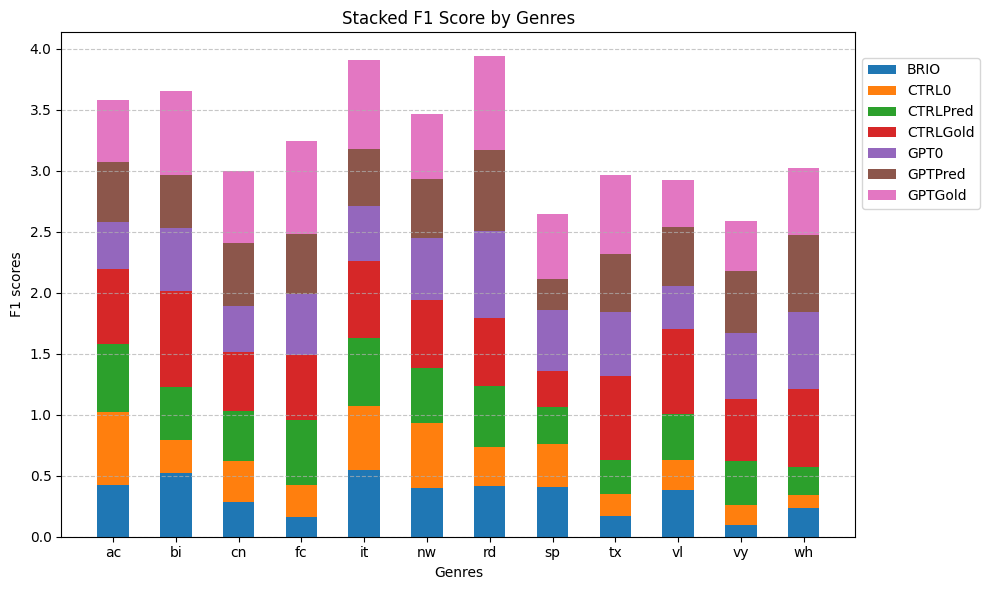

In [ ]:
# Data provided
data = {
"categories":['ac', 'bi', 'cn', 'fc', 'it', 'nw', 'rd', 'sp', 'tx', 'vl', 'vy', 'wh'],
"BRIO": [0.421, 0.522, 0.284, 0.160, 0.550, 0.400, 0.417, 0.410, 0.166, 0.379, 0.099, 0.233],
"CTRL0" :[0.600, 0.273, 0.333, 0.261, 0.519, 0.529, 0.316, 0.353, 0.182, 0.250, 0.158, 0.108],
"CTRLPred":[0.558, 0.434, 0.413, 0.533, 0.564, 0.452, 0.500, 0.299, 0.283, 0.377, 0.360, 0.229],
"CTRLGold" :[0.615, 0.788, 0.485, 0.538, 0.625, 0.558, 0.563, 0.299, 0.686, 0.696, 0.508, 0.643],
"GPT0" :[0.389, 0.513, 0.378, 0.500, 0.455, 0.510, 0.710, 0.500, 0.524, 0.356, 0.542, 0.633],
"GPTPred" :[0.485, 0.439, 0.513, 0.486, 0.462, 0.480, 0.667, 0.255, 0.478, 0.478, 0.508, 0.625],
"GPTGold" :[0.514, 0.684, 0.595, 0.765, 0.737, 0.537, 0.765, 0.531, 0.649, 0.391, 0.413, 0.552]
}

# Creating DataFrame
df = pd.DataFrame(data)
#print(df)

bar_width = 0.5
index = df.index
fig, ax = plt.subplots(figsize=(10, 6))

# Stacked bar plot
for i, column in enumerate(df.columns[1:]):
    if i == 0:
        ax.bar(df['categories'], df[column], width=bar_width, label=column)
    else:
        ax.bar(df['categories'], df[column], bottom=df[df.columns[1:i+1]].sum(axis=1), width=bar_width, label=column)

ax.set_xlabel('Genres')
ax.set_ylabel('F1 scores')
ax.set_title('Stacked F1 Score by Genres')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

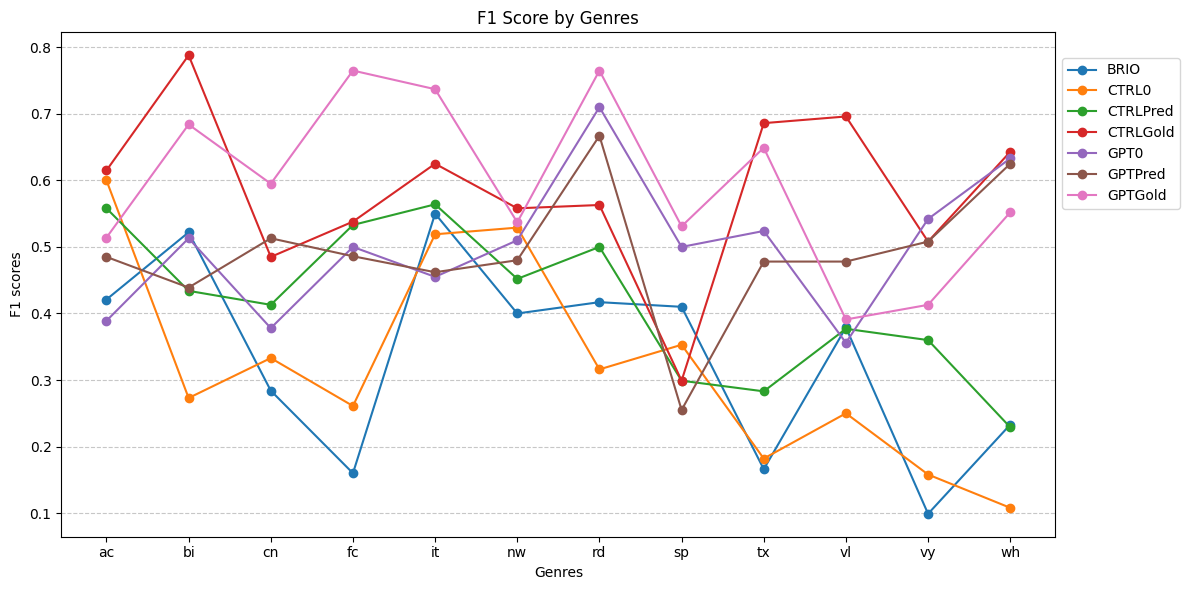

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data provided
data = {
    "categories":['ac', 'bi', 'cn', 'fc', 'it', 'nw', 'rd', 'sp', 'tx', 'vl', 'vy', 'wh'],
    "BRIO": [0.421, 0.522, 0.284, 0.160, 0.550, 0.400, 0.417, 0.410, 0.166, 0.379, 0.099, 0.233],
    "CTRL0" :[0.600, 0.273, 0.333, 0.261, 0.519, 0.529, 0.316, 0.353, 0.182, 0.250, 0.158, 0.108],
    "CTRLPred":[0.558, 0.434, 0.413, 0.533, 0.564, 0.452, 0.500, 0.299, 0.283, 0.377, 0.360, 0.229],
    "CTRLGold" :[0.615, 0.788, 0.485, 0.538, 0.625, 0.558, 0.563, 0.299, 0.686, 0.696, 0.508, 0.643],
    "GPT0" :[0.389, 0.513, 0.378, 0.500, 0.455, 0.510, 0.710, 0.500, 0.524, 0.356, 0.542, 0.633],
    "GPTPred" :[0.485, 0.439, 0.513, 0.486, 0.462, 0.480, 0.667, 0.255, 0.478, 0.478, 0.508, 0.625],
    "GPTGold" :[0.514, 0.684, 0.595, 0.765, 0.737, 0.537, 0.765, 0.531, 0.649, 0.391, 0.413, 0.552]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 6))

# Line plot
for column in df.columns[1:]:
    plt.plot(df['categories'], df[column], marker='o', label=column)

plt.xlabel('Genres')
plt.ylabel('F1 scores')
plt.title('F1 Score by Genres')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


   Categories  brio  ctrl0  ctrlpred  ctrlgold  gpt0  gptpred  gptgold
0          ac  0.65   0.59      0.55      0.59  0.64     0.64     0.66
1          bi  0.65   0.65      0.67      0.69  0.72     0.70     0.73
2          cn  0.55   0.45      0.47      0.50  0.59     0.62     0.62
3          fc  0.51   0.49      0.51      0.52  0.64     0.65     0.65
4          it  0.66   0.64      0.63      0.65  0.69     0.69     0.70
5          nw  0.63   0.63      0.61      0.68  0.73     0.72     0.72
6          rd  0.56   0.51      0.50      0.54  0.64     0.63     0.64
7          sp  0.61   0.54      0.55      0.57  0.66     0.65     0.69
8          tx  0.56   0.52      0.51      0.57  0.64     0.61     0.63
9          vl  0.56   0.50      0.51      0.53  0.64     0.69     0.64
10         vy  0.58   0.56      0.56      0.60  0.66     0.66     0.68
11         wh  0.54   0.53      0.51      0.56  0.67     0.67     0.67


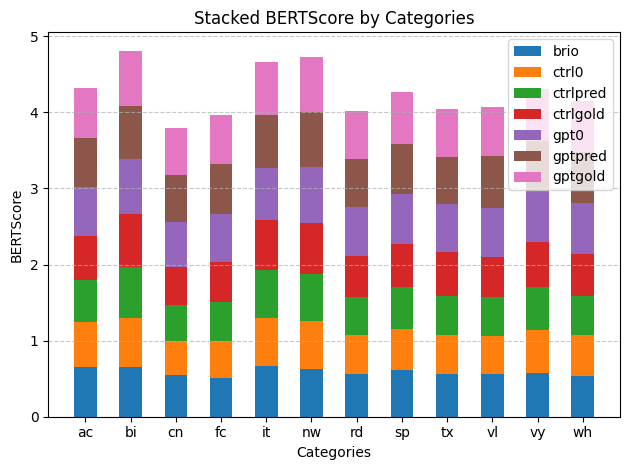

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from the LaTeX table
data = {
    "Categories": ['ac', 'bi', 'cn', 'fc', 'it', 'nw', 'rd', 'sp', 'tx', 'vl', 'vy', 'wh'],
    "brio": [.65, .65, .55, .51, .66, .63, .56, .61, .56, .56, .58, .54],
    "ctrl0" :[.59, .65, .45, .49, .64, .63, .51, .54, .52, .50, .56, .53],
    "ctrlpred":[.55, .67, .47, .51, .63, .61, .50, .55, .51, .51, .56, .51],
    "ctrlgold":[.59, .69, .50, .52, .65, .68, .54, .57, .57, .53, .60, .56],
    "gpt0" :[.64, .72, .59, .64, .69, .73, .64, .66, .64, .64, .66, .67],
    "gptpred" :[.64, .70, .62, .65, .69, .72, .63, .65, .61, .69, .66, .67],
    "gptgold" :[.66, .73, .62, .65, .70, .72, .64, .69, .63, .64, .68, .67]}
# Creating DataFrame
df = pd.DataFrame(data)
#print(df)

bar_width = 0.5
index = df.index

# Stacked bar plot
for i, column in enumerate(df.columns[1:]):
    if i == 0:
        plt.bar(df['Categories'], df[column], width=bar_width, label=column)
    else:
        plt.bar(df['Categories'], df[column], bottom=df[df.columns[1:i+1]].sum(axis=1), width=bar_width, label=column)

plt.xlabel('Categories')
plt.ylabel('BERTScore')
plt.title('Stacked BERTScore by Categories')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

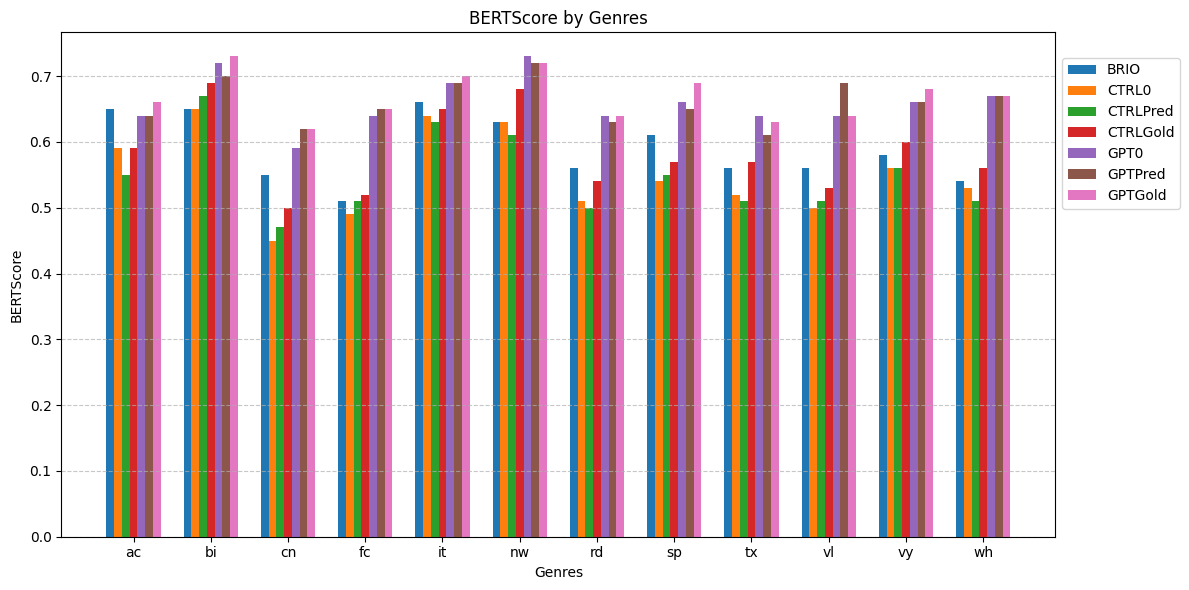

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Provided data
data = {
    "Categories": ['ac', 'bi', 'cn', 'fc', 'it', 'nw', 'rd', 'sp', 'tx', 'vl', 'vy', 'wh'],
    "BRIO": [.65, .65, .55, .51, .66, .63, .56, .61, .56, .56, .58, .54],
    "CTRL0" : [.59, .65, .45, .49, .64, .63, .51, .54, .52, .50, .56, .53],
    "CTRLPred": [.55, .67, .47, .51, .63, .61, .50, .55, .51, .51, .56, .51],
    "CTRLGold": [.59, .69, .50, .52, .65, .68, .54, .57, .57, .53, .60, .56],
    "GPT0" : [.64, .72, .59, .64, .69, .73, .64, .66, .64, .64, .66, .67],
    "GPTPred" : [.64, .70, .62, .65, .69, .72, .63, .65, .61, .69, .66, .67],
    "GPTGold" : [.66, .73, .62, .65, .70, .72, .64, .69, .63, .64, .68, .67]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 6))

bar_width = 0.1
index = np.arange(len(df['Categories']))

# Grouped bar plot
for i, column in enumerate(df.columns[1:]):
    plt.bar(index + bar_width * i, df[column], width=bar_width, label=column)

plt.xlabel('Genres')
plt.ylabel('BERTScore')
plt.title('BERTScore by Genres')
plt.xticks(index + bar_width * (len(df.columns[1:]) - 1) / 2, df['Categories'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


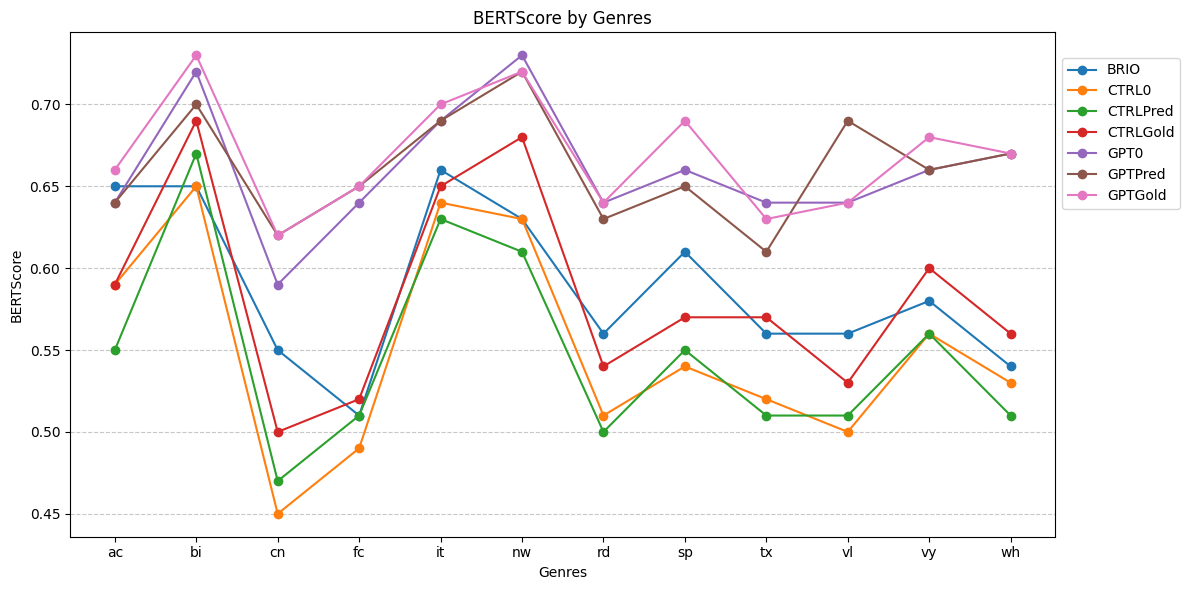

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Provided data
data = {
    "Categories": ['ac', 'bi', 'cn', 'fc', 'it', 'nw', 'rd', 'sp', 'tx', 'vl', 'vy', 'wh'],
    "BRIO": [.65, .65, .55, .51, .66, .63, .56, .61, .56, .56, .58, .54],
    "CTRL0" : [.59, .65, .45, .49, .64, .63, .51, .54, .52, .50, .56, .53],
    "CTRLPred": [.55, .67, .47, .51, .63, .61, .50, .55, .51, .51, .56, .51],
    "CTRLGold": [.59, .69, .50, .52, .65, .68, .54, .57, .57, .53, .60, .56],
    "GPT0" : [.64, .72, .59, .64, .69, .73, .64, .66, .64, .64, .66, .67],
    "GPTPred" : [.64, .70, .62, .65, .69, .72, .63, .65, .61, .69, .66, .67],
    "GPTGold" : [.66, .73, .62, .65, .70, .72, .64, .69, .63, .64, .68, .67]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 6))

index = np.arange(len(df['Categories']))

# Line plot
for column in df.columns[1:]:
    plt.plot(index, df[column], marker='o', label=column)

plt.xlabel('Genres')
plt.ylabel('BERTScore')
plt.title('BERTScore by Genres')
plt.xticks(index, df['Categories'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
